In [1]:
import pandas as pd
import json
import flair
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence
import torch
import re
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(9000)

In [2]:
emb = WordEmbeddings('pl')

In [3]:
with open("recipes3.json") as file:
    data = json.load(file)

# Podobieństwo kosinusowe

In [4]:
def cos(V,U):
    return V @ U.T / (V.norm(1) * U.norm(1).T)

# Przygotowanie danych

In [5]:
# Tytuły
T = [d['title'] for d in data]

In [6]:
# Zdania
S = [Sentence(t) for t in T]

In [7]:
# Embeddowanie
for s in S: emb.embed(s)

In [8]:
# to vec
V = [torch.cat([ss.embedding for ss in s]) for s in S]

In [9]:
# Do macierzy embeddingów
M = [v.reshape(int(v.shape[0]/300), 300) for v in V]

# Klastrowanie na podstawie średniego embeddingu title

In [29]:
Mean = np.concatenate([m.mean(0).cpu().numpy() for m in M]).reshape(int(2797800/300), 300)

In [32]:
np.linalg.norm(np.random.rand(10))

1.8487615912963369

In [33]:
linked = linkage(Mean, 'single', metric=lambda x,y: 1 - (x @ y)/np.linalg.norm(x)/np.linalg.norm(y))

C:\Users\Piotr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


ValueError: The condensed distance matrix must contain only finite values.

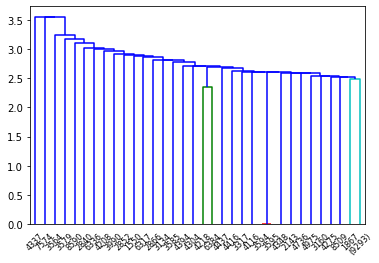

In [26]:
plt.figure()
dg = dendrogram(linked,
            orientation='top',v
            truncate_mode='level',
            distance_sort='descending')
plt.show()